# 三角板目标检测-可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

20230607

## 进入mmdetection主目录

In [1]:
import os
os.chdir('mmdetection')

## 导入工具包

In [2]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [1]:
# 日志文件路径
log_path = 'work_dirs/faster_r_cnn_triangle/20230511_234855/vis_data/scalars.json'

# log_path = 'work_dirs/rtmdet_tiny_triangle/20230511_234855/vis_data/scalars.json'

In [4]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [5]:
len(json_list)

4310

In [6]:
eval(json_list[4])

{'lr': 0.00018016032064128258,
 'data_time': 0.10732541084289551,
 'loss': 1.554654097557068,
 'loss_rpn_cls': 0.7000267386436463,
 'loss_rpn_bbox': 0.01174525087699294,
 'loss_cls': 0.8412070512771607,
 'acc': 91.30859375,
 'loss_bbox': 0.0016750632668845356,
 'time': 0.3841512203216553,
 'epoch': 1,
 'memory': 3177,
 'step': 5}

In [7]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

100%|██████████| 4310/4310 [00:04<00:00, 985.66it/s] 


In [8]:
df_train

,lr,data_time,loss,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,time,epoch,memory,step
0,0.00002,0.496813,1.745113,0.697028,0.010730,1.036911,4.296875,0.000443,0.868021,1.0,3018.0,1.0
1,0.00006,0.255589,1.723127,0.701383,0.013017,1.008303,4.296875,0.000424,0.570157,1.0,3283.0,2.0
2,0.00010,0.173261,1.672904,0.699922,0.012187,0.960405,5.957031,0.000391,0.470132,1.0,3283.0,3.0
3,0.00014,0.132102,1.623487,0.700816,0.013017,0.909276,33.398438,0.000379,0.419139,1.0,3283.0,4.0
4,0.00018,0.107325,1.554654,0.700027,0.011745,0.841207,91.308594,0.001675,0.384151,1.0,3177.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0.00020,0.006442,0.066295,0.003812,0.006429,0.021561,99.023438,0.034493,0.277901,50.0,3177.0,4296.0
4296,0.00020,0.006451,0.067425,0.003638,0.006775,0.022045,98.730469,0.034965,0.278211,50.0,3283.0,4297.0
4297,0.00020,0.006454,0.066920,0.003666,0.006712,0.021902,99.316406,0.034640,0.277896,50.0,3177.0,4298.0
4298,0.00020,0.006462,0.067548,0.003785,0.006692,0.022116,98.535156,0.034956,0.278304,50.0,3283.0,4299.0


In [9]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,pascal_voc/mAP,pascal_voc/AP50,data_time,time,step
0,0.411,0.948,0.217,-1.0,-1.0,0.411,0.948099,0.948,0.074389,0.178963,5.0
1,0.818,0.977,0.957,-1.0,-1.0,0.818,0.991736,0.992,0.058926,0.160506,10.0
2,0.839,0.979,0.960,-1.0,-1.0,0.839,0.995671,0.996,0.066158,0.166594,15.0
3,0.842,0.979,0.960,-1.0,-1.0,0.842,0.995671,0.996,0.065453,0.166578,20.0
4,0.841,0.979,0.960,-1.0,-1.0,0.841,0.995671,0.996,0.060269,0.165117,25.0
5,0.847,0.978,0.960,-1.0,-1.0,0.847,0.995671,0.996,0.073501,0.173967,30.0
6,0.848,0.979,0.960,-1.0,-1.0,0.848,0.995671,0.996,0.067540,0.170206,35.0
7,0.846,0.979,0.960,-1.0,-1.0,0.846,0.995671,0.996,0.057506,0.158793,40.0
8,0.852,0.979,0.960,-1.0,-1.0,0.852,0.997783,0.998,0.069616,0.170459,45.0
9,0.848,0.979,0.960,-1.0,-1.0,0.848,0.998878,0.999,0.063433,0.165182,50.0


## 导出训练日志表格

In [10]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [11]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [12]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [13]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-05-12 08:45:29--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  22.5MB/s    用时 0.4s    

2023-05-12 08:45:30 (22.5 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



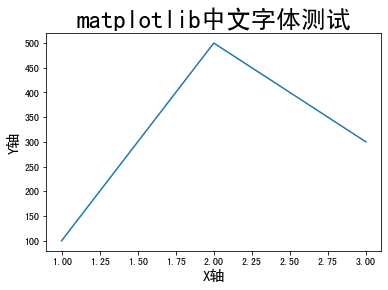

In [14]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [15]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [16]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_rpn_cls', 'loss_rpn_bbox', 'loss_cls',
       'acc', 'loss_bbox', 'time', 'epoch', 'memory', 'step'],
      dtype='object')

In [17]:
metrics = ['loss', 'loss_bbox', 'loss_cls', 'loss_rpn_cls', 'loss_rpn_bbox']

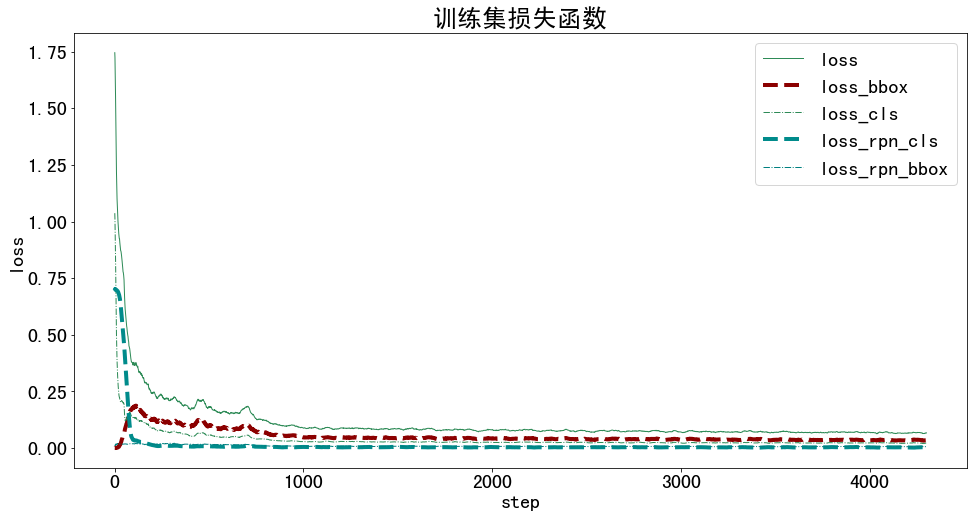

In [18]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率（如果图是空的，说明没有`acc`这个指标，跳过本图即可）

In [19]:
metrics = ['acc']

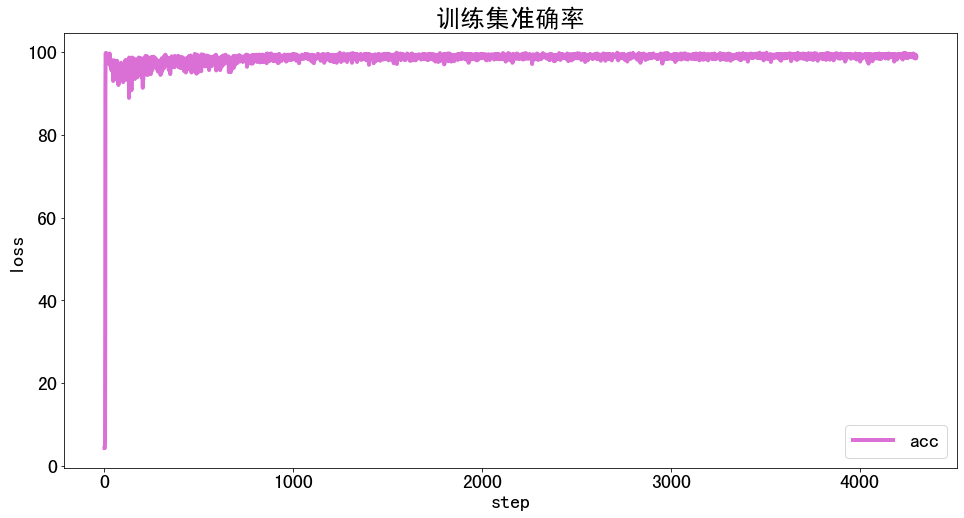

In [20]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [21]:
df_test.columns

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l',
       'pascal_voc/mAP', 'pascal_voc/AP50', 'data_time', 'time', 'step'],
      dtype='object')

In [22]:
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']

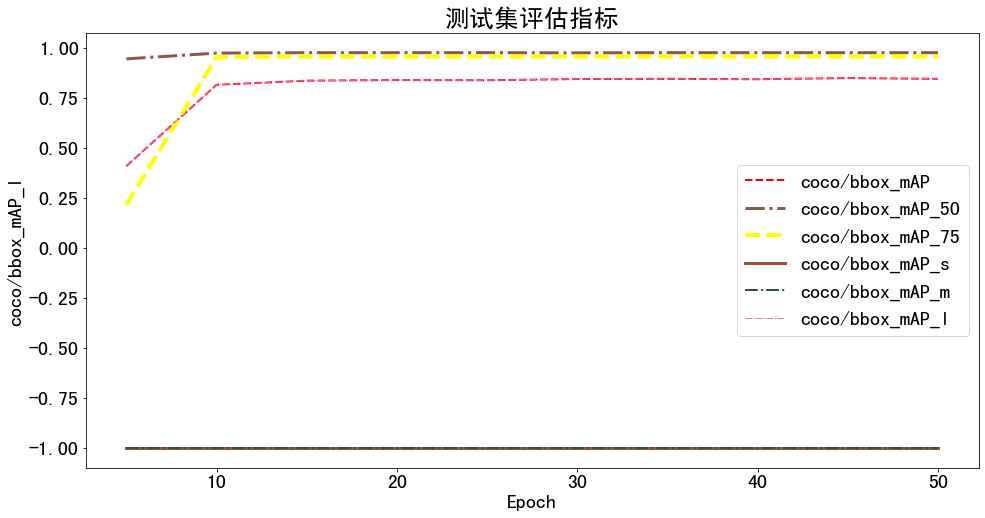

In [23]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-PASCAL VOC Metric（如果生成的图是空的，说明没有pascal voc指标，跳过本图即可）

In [24]:
metrics = ['pascal_voc/mAP', 'pascal_voc/AP50']

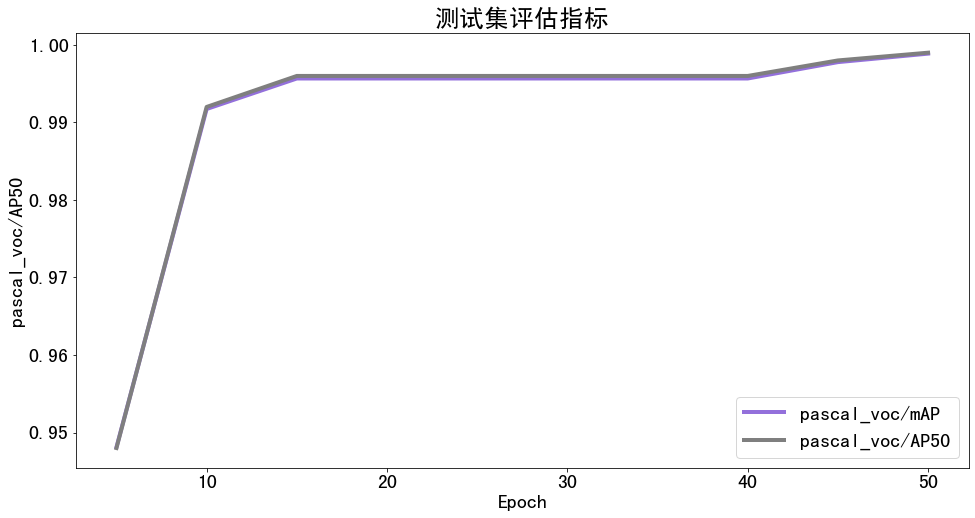

In [25]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()